In [64]:
from datasets import load_dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

In [75]:
def convertJSONToList(row, key_name, col_name):
    try:
        res = json.loads(row[col_name])
        num_dict_list = [ele[key_name] for ele in res.values()]
        if all(isinstance(num, (int, float)) for num in num_dict_list):
            return np.array(num_dict_list).flatten()
        else:
            num_list = [list(num_dict.values()) for num_dict in num_dict_list]
            return np.array(num_list).flatten()
    except (json.JSONDecodeError, TypeError, KeyError) as e:
            print(f"An error occurred: {e}")

In [114]:
hf_dataset = load_dataset(f"Howard881010/climate-1_day-mixed-mixed-cal")
nlinear_dataset = pd.read_csv("/home/ubuntu/multimodal/Predictions_and_attempts/climate/1_day/mixed-mixed-cal/nlinear_output_validation.csv")
train_data = pd.DataFrame(hf_dataset['train'])
val_data = pd.DataFrame(hf_dataset['validation'])
input_values = []
model_values = []

num_key_name = "temperature"
for idx, row in train_data.iterrows():
    input_num = convertJSONToList(row, num_key_name, "input")
    input_values.append(input_num)

for idx, row in val_data.iterrows():
    pred_num = convertJSONToList(row, num_key_name, "pred_output")
    fut_num = convertJSONToList(row, num_key_name, "output")

    if pred_num is not None and len(fut_num) == len(pred_num) and all(isinstance(element, float) for element in pred_num):
        input_values.append(fut_num)
        model_values.append(pred_num)
    else:
        input_values.append(fut_num)
        model_values.append(fut_num)

nlinear_dataset['pred_values'] = nlinear_dataset['pred_values'].apply(lambda x: np.array(eval(x)).flatten())
nlinear_values = nlinear_dataset['pred_values'].values.tolist()

input_values = np.array(input_values).reshape(-1)
model_values = np.array(model_values).reshape(-1)
nlinear_values = np.array(nlinear_values).reshape(-1)

An error occurred: Expecting value: line 1 column 1 (char 0)
An error occurred: Expecting value: line 1 column 1 (char 0)


In [115]:
print("shape: ", input_values.shape, model_values.shape, nlinear_values.shape)

shape:  (847,) (94,) (94,)


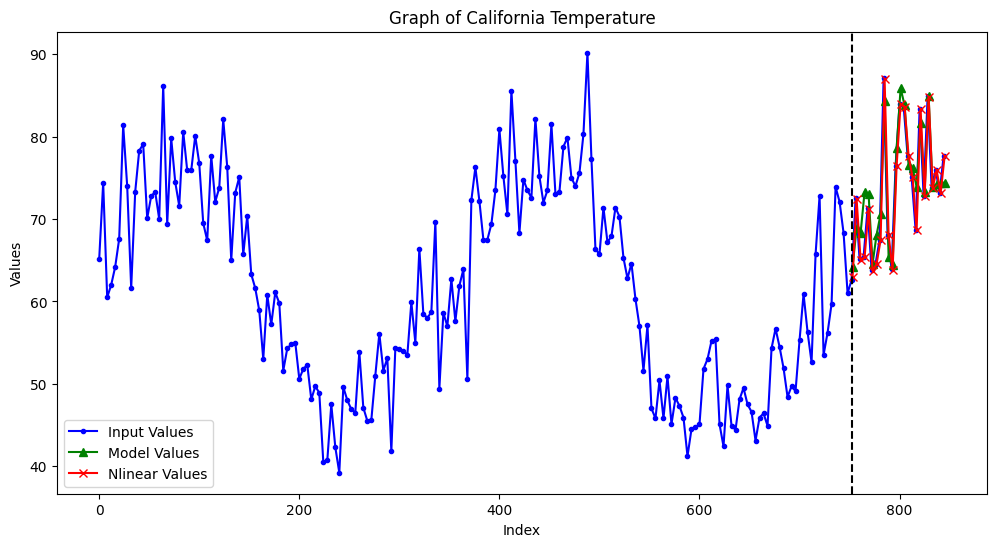

In [120]:
x_input = range(len(input_values))
x_model = range(len(input_values) - len(model_values), len(input_values))
x_nlinear = range(len(input_values) - len(nlinear_values), len(input_values))

# Function to reduce points for plotting
def reduce_points(x, y, step=4):
    return x[::step], y[::step]

# Reduce points
x_input_reduced, input_values_reduced = reduce_points(x_input, input_values)
x_model_reduced, model_values_reduced = reduce_points(x_model, model_values)
x_nlinear_reduced, nlinear_values_reduced = reduce_points(x_nlinear, nlinear_values)

# Plot each segment
plt.figure(figsize=(12, 6))
plt.plot(x_input_reduced, input_values_reduced, 'b.-', label='Input Values')
plt.plot(x_model_reduced, model_values_reduced, 'g^-', label='Model Values')
plt.plot(x_nlinear_reduced, nlinear_values_reduced, 'rx-', label='Nlinear Values')

# Add vertical line to indicate where input values end
plt.axvline(x=len(input_values)-1 - len(model_values), color='k', linestyle='--')

# Add legend
plt.legend()

# Add titles and labels
plt.title('Graph of California Temperature')
plt.xlabel('Index')
plt.ylabel('Values')
plt.savefig('plot.png')
# Show plot
plt.show()
